# Manifold Learning - tSNE - Advanced Topics

## Sanity Check: What is tSNE doing with Random Noise?

Automatically created module for IPython interactive environment


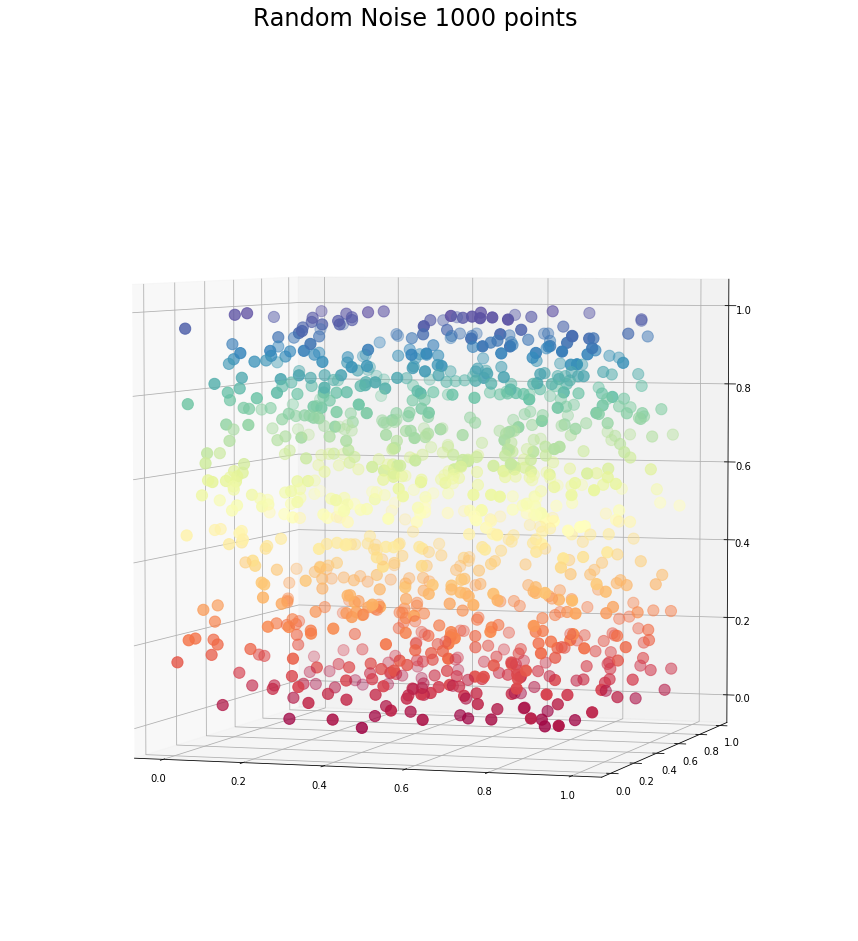

In [1]:
# Adjustments by S.Kuehn, stefan.kuehn@xing.com

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn import manifold, datasets
import numpy as np

# Next line to silence pyflakes. This import is needed.
Axes3D

# Parameters
n_points = 1000
n_components = 2 # for tSNE only
init_random_state=0 # for all methods, change if you like (42 is the value of choice)

# Generate a random point cloud, take z component for coloring
X2 = np.random.rand(n_points, 3)
color2 = X2[:,2]

fig = plt.figure(figsize=(15, 15))
plt.suptitle("Random Noise %i points"
             % (n_points), fontsize=24)

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=color2, cmap=plt.cm.Spectral,s=125)
ax.view_init(4, -72)

## tSNE - A deeper look

t-SNE: 21 sec


(-34.69261543896035, 37.99418823864297, -44.67777101419883, 40.984026354775)

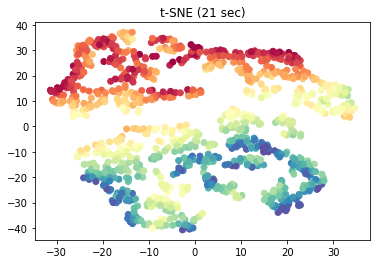

In [2]:
# tSNE with random noise as input
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=42)
Y = tsne.fit_transform(X2)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color2, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


tSNE seems to enforce a certain local structure even it is not really there.

## Compare this with Random Projections and PCA

(-0.9935762024892358,
 0.9851223962400899,
 -0.03151550950366211,
 1.9333913415704396)

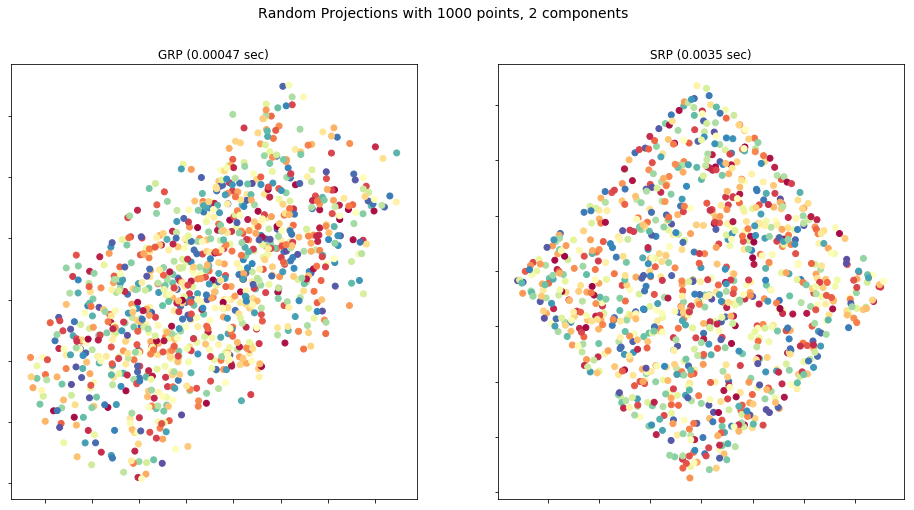

In [15]:
from sklearn import random_projection

fig = plt.figure(figsize=(16, 8))
plt.suptitle("Random Projections with %i points, %i components"
             % (n_points, n_components), fontsize=14)

t0 = time()
transformer = random_projection.GaussianRandomProjection(n_components=2, random_state=init_random_state)
Y = transformer.fit_transform(X2)
t1 = time()
    
ax = fig.add_subplot(121)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('GRP', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
transformer = random_projection.SparseRandomProjection(n_components=2, random_state=init_random_state)
Y = transformer.fit_transform(X2)
t1 = time()
    
ax = fig.add_subplot(121+1)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('SRP', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


(-0.7411594164484578,
 0.747502398007698,
 -0.7487384429825963,
 0.778031377989729)

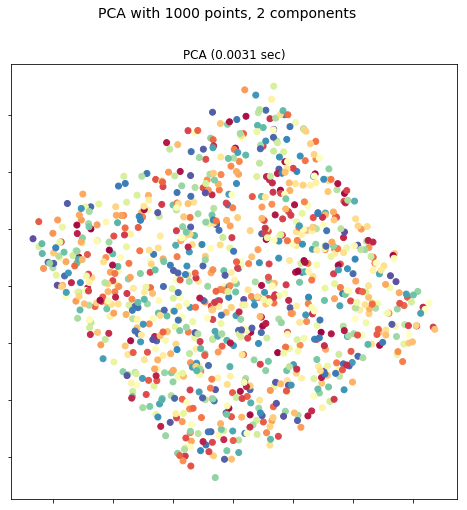

In [16]:
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 8))
plt.suptitle("PCA with %i points, %i components"
             % (n_points, n_components), fontsize=14)

init_random_state=0

t0 = time()
pca = PCA(n_components=2)
Y = pca.fit_transform(X2)
t1 = time()
    
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('PCA', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
